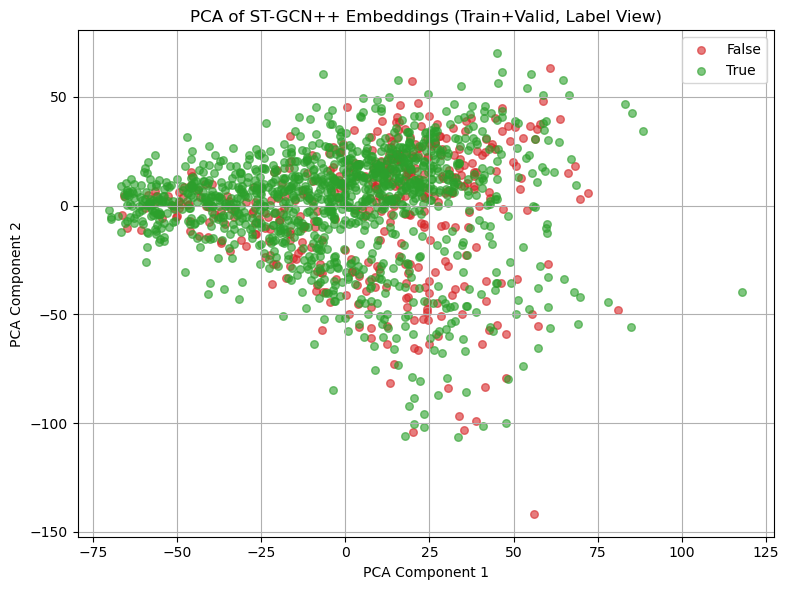

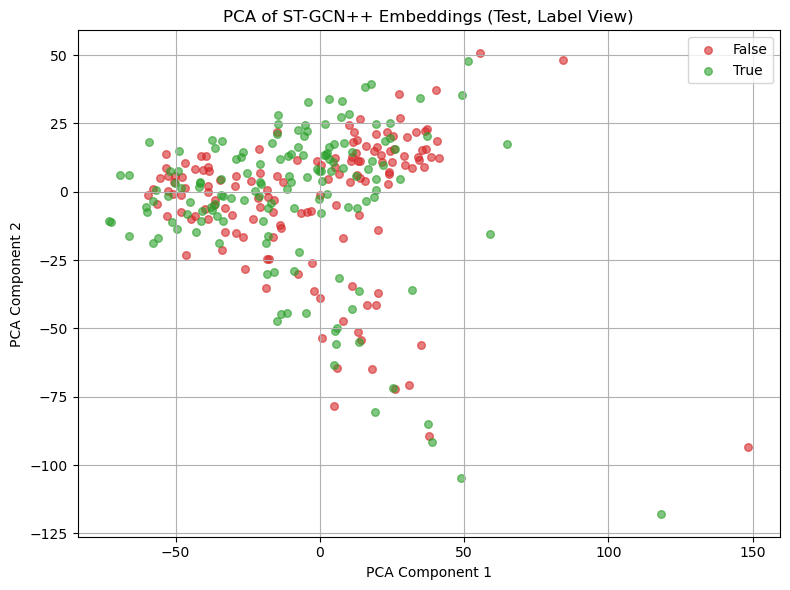

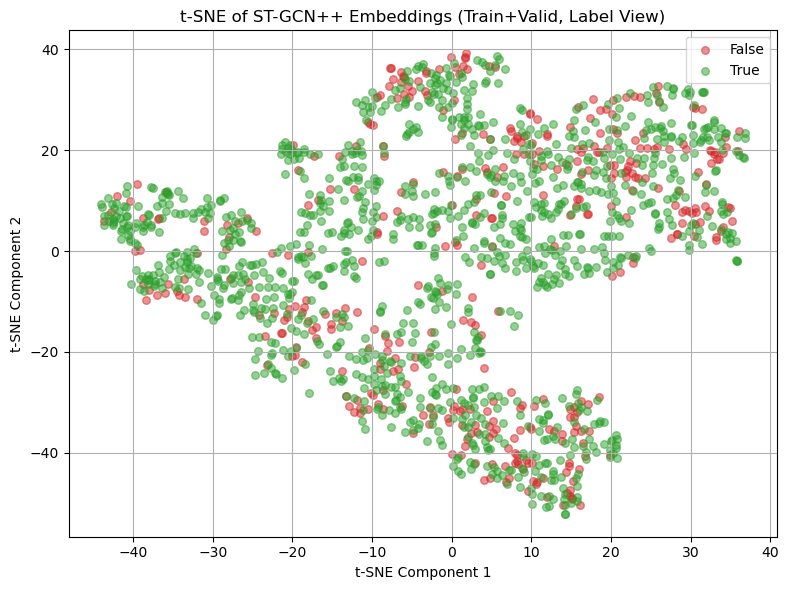

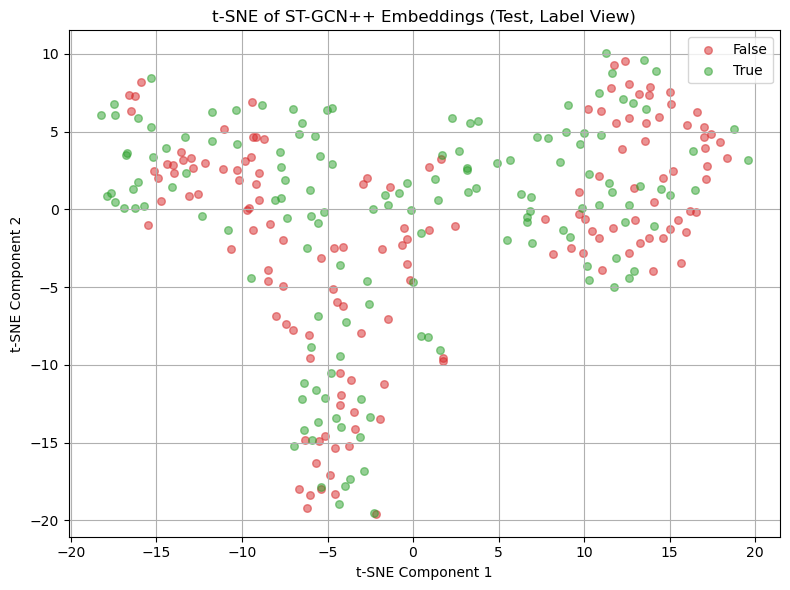

c:\Users\qqppq\anaconda3\envs\classifier_fusion\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


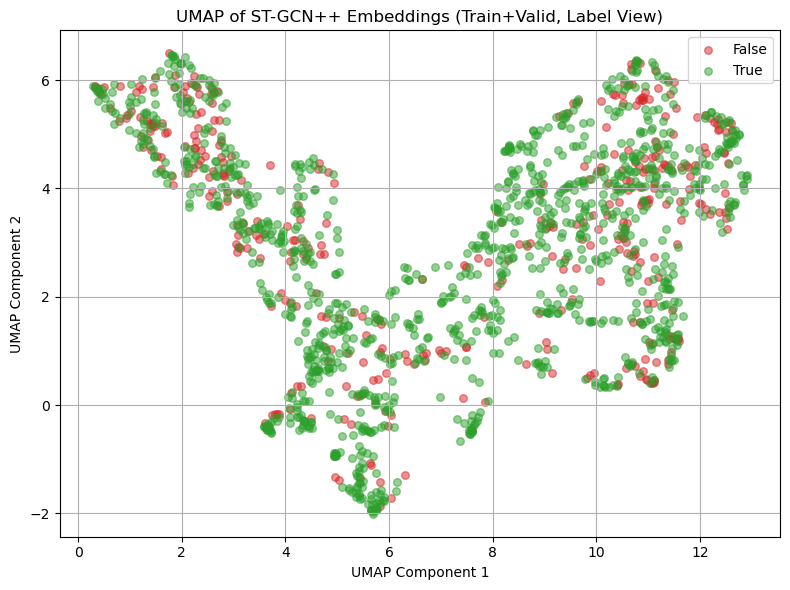

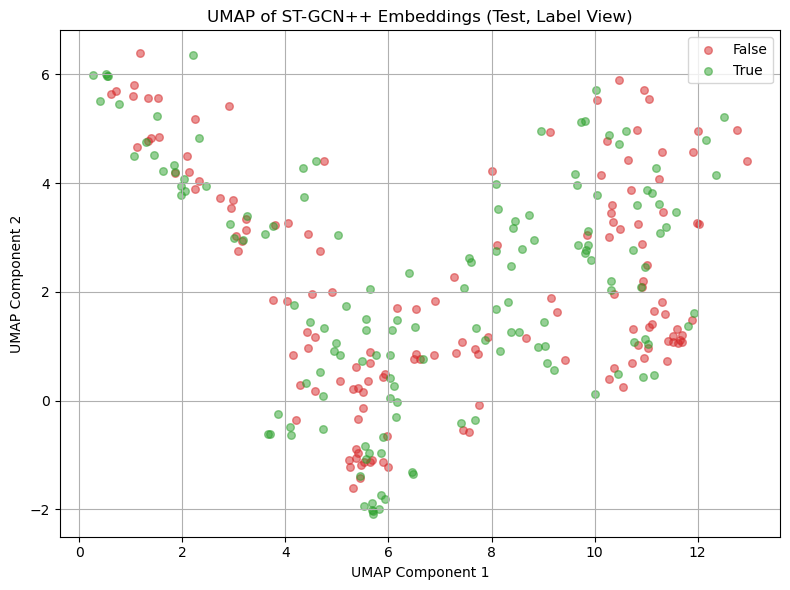

In [3]:
# 📌 ST-GCN++ 임베딩만 이용한 PCA, t-SNE, UMAP 시각화 (ID 정렬 없이, PCA_analysis.ipynb 구조 참고)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import umap
from pathlib import Path

# ───────────── 설정 ─────────────
DATA_ROOT = Path(r"D:\Jabez\golf\fusion\embedding_data\stgcnpp")
AGG_METHOD = "flatten"  # "mean", "max", "flatten" 중 선택

def reduce_stgcn(arr):
    if arr is None or len(arr) == 0:
        return np.empty((0, 0))
    if AGG_METHOD == "mean":    return np.nanmean(arr, axis=1)
    if AGG_METHOD == "max":     return np.nanmax(arr, axis=1)
    if AGG_METHOD == "flatten": return arr.reshape(arr.shape[0], -1)
    raise ValueError("Invalid AGG_METHOD")

# ───────────── ST-GCN 임베딩 및 라벨 npy 직접 불러오기 ─────────────
def load_npy(split):
    base = DATA_ROOT / split
    emb_path = base / "embeddings.npy"
    lbl_path = base / "labels.npy"
    if not emb_path.exists() or not lbl_path.exists():
        print(f"⚠️ {split} 경로에 필요한 파일이 없습니다. 스킵합니다.")
        return None, None
    emb = np.load(emb_path)
    lbl = np.load(lbl_path).ravel()
    return emb, lbl

X_tr, y_tr = load_npy("train")
X_va, y_va = load_npy("valid")
X_te, y_te = load_npy("test")

X_tr = reduce_stgcn(X_tr)
X_va = reduce_stgcn(X_va)
X_te = reduce_stgcn(X_te)

# 데이터 분리
X_trainval = np.vstack([X_tr, X_va])
y_trainval = np.concatenate([y_tr, y_va])
X_test = X_te
y_test = y_te

# 정규화 (train+valid 기준)
scaler = StandardScaler().fit(X_trainval)
X_trainval_scaled = scaler.transform(X_trainval)
X_test_scaled = scaler.transform(X_test)

# PCA
pca = PCA(n_components=2)
X_trainval_2d = pca.fit_transform(X_trainval_scaled)
X_test_2d = pca.transform(X_test_scaled)

# --- train+valid (Label View) ---
plt.figure(figsize=(8, 6))
for label, color, name in zip([0, 1], ['tab:red', 'tab:green'], ['False', 'True']):
    idx = y_trainval == label
    plt.scatter(X_trainval_2d[idx, 0], X_trainval_2d[idx, 1], label=name, alpha=0.6, s=30, color=color)
plt.legend()
plt.title("PCA of ST-GCN++ Embeddings (Train+Valid, Label View)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- test (Label View) ---
plt.figure(figsize=(8, 6))
for label, color, name in zip([0, 1], ['tab:red', 'tab:green'], ['False', 'True']):
    idx = y_test == label
    plt.scatter(X_test_2d[idx, 0], X_test_2d[idx, 1], label=name, alpha=0.6, s=30, color=color)
plt.legend()
plt.title("PCA of ST-GCN++ Embeddings (Test, Label View)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

# t-SNE (train+valid)
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_trainval_tsne = tsne.fit_transform(X_trainval_scaled)
X_test_tsne = tsne.fit_transform(X_test_scaled)

plt.figure(figsize=(8, 6))
for label, color, name in zip([0, 1], ['tab:red', 'tab:green'], ['False', 'True']):
    idx = y_trainval == label
    plt.scatter(X_trainval_tsne[idx, 0], X_trainval_tsne[idx, 1], label=name, alpha=0.5, s=30, color=color)
plt.legend()
plt.title("t-SNE of ST-GCN++ Embeddings (Train+Valid, Label View)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
for label, color, name in zip([0, 1], ['tab:red', 'tab:green'], ['False', 'True']):
    idx = y_test == label
    plt.scatter(X_test_tsne[idx, 0], X_test_tsne[idx, 1], label=name, alpha=0.5, s=30, color=color)
plt.legend()
plt.title("t-SNE of ST-GCN++ Embeddings (Test, Label View)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

# UMAP (train+valid)
reducer = umap.UMAP(n_components=2, random_state=42)
X_trainval_umap = reducer.fit_transform(X_trainval_scaled)
X_test_umap = reducer.transform(X_test_scaled)

plt.figure(figsize=(8, 6))
for label, color, name in zip([0, 1], ['tab:red', 'tab:green'], ['False', 'True']):
    idx = y_trainval == label
    plt.scatter(X_trainval_umap[idx, 0], X_trainval_umap[idx, 1], label=name, alpha=0.5, s=30, color=color)
plt.legend()
plt.title("UMAP of ST-GCN++ Embeddings (Train+Valid, Label View)")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
for label, color, name in zip([0, 1], ['tab:red', 'tab:green'], ['False', 'True']):
    idx = y_test == label
    plt.scatter(X_test_umap[idx, 0], X_test_umap[idx, 1], label=name, alpha=0.5, s=30, color=color)
plt.legend()
plt.title("UMAP of ST-GCN++ Embeddings (Test, Label View)")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()